In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
atm = pd.read_parquet("atmosphere.parquet")

In [3]:
wfe = np.vstack(atm["Wavefront"])
wfe.shape

(100, 591361)

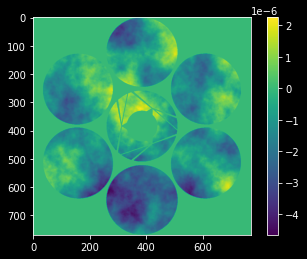

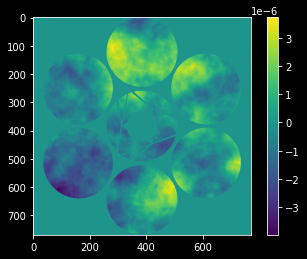

In [5]:
for k in [0,-1]:
    fig,ax = plt.subplots()
    h = ax.imshow(wfe[k, :].reshape(769, -1))
    fig.colorbar(h,ax=ax)

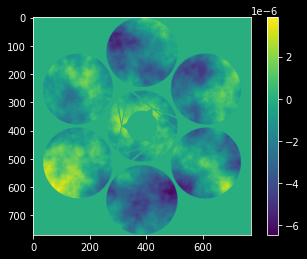

In [6]:
plt.imshow(wfe[0, :].reshape(769, -1)-wfe[-1, :].reshape(769, -1))
plt.colorbar()


In [7]:
free_atm = pd.read_parquet("free-atmosphere.parquet")
wfe_noground = np.vstack(free_atm["Wavefront"])
ds_free_atm = pd.read_parquet("dome-seeing_free-atmosphere.parquet")
dsa_wfe = np.vstack(ds_free_atm["Wavefront"])


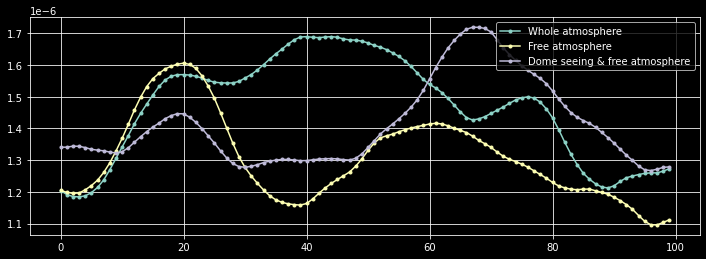

In [8]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(atm["WfeRms"],'.-',label="Whole atmosphere")
ax.plot(free_atm["WfeRms"],'.-',label="Free atmosphere")
ax.plot(ds_free_atm["WfeRms"], '.-', label="Dome seeing & free atmosphere")
ax.grid()
ax.legend()


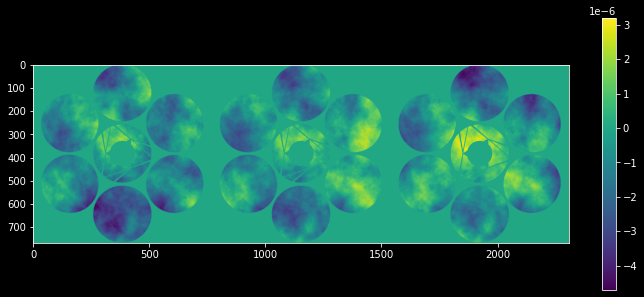

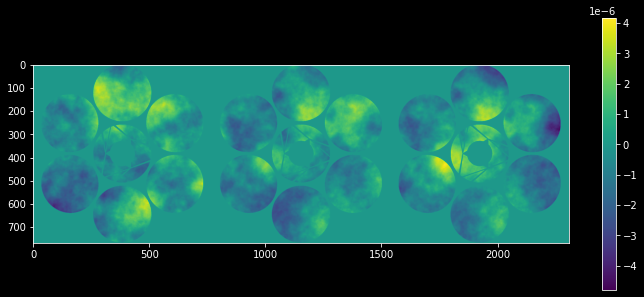

In [9]:
for k in [0,-1]:
    fig,ax = plt.subplots(figsize=(12,5))
    h = ax.imshow(np.hstack([x.reshape(769, -1)
                  for x in [wfe[k], wfe_noground[k], dsa_wfe[k]]]))
    fig.colorbar(h,ax=ax)

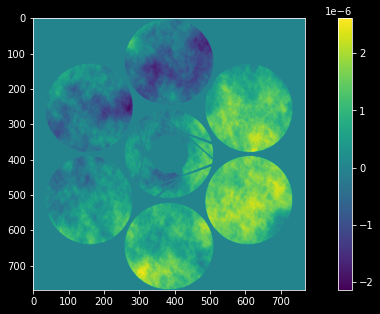

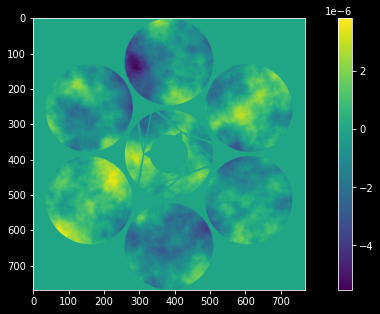

In [10]:
for k in [0,-1]:
    fig,ax = plt.subplots(figsize=(12,5))
    h = ax.imshow(np.diff(np.dstack([x.reshape(769, -1) for x in [wfe[k],wfe_noground[k]]])).squeeze())
    fig.colorbar(h,ax=ax)

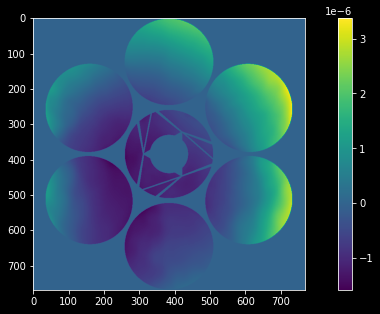

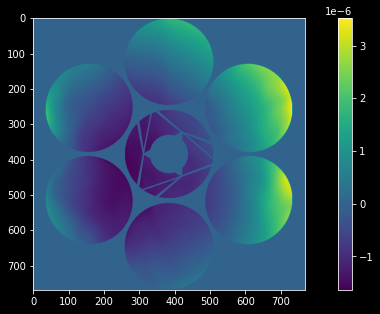

In [11]:
for k in [0,-1]:
    fig,ax = plt.subplots(figsize=(12,5))
    h = ax.imshow(np.diff(np.dstack([x.reshape(769, -1) for x in [dsa_wfe[k],wfe_noground[k]]])).squeeze())
    fig.colorbar(h,ax=ax)